In [2]:
import csv
import math
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm

In [3]:
a=[]
with open('r1z1.csv', newline='') as csvfile:
     reader = csv.reader(csvfile,quoting=csv.QUOTE_NONNUMERIC)
     for row in reader:
        a.append(row[0])
a.pop(0) #удаление название столбца типа str
a.sort()
print(a)

[114.0, 115.0, 116.0, 116.0, 116.7, 117.0, 117.0, 117.2, 117.2, 117.8, 118.0, 118.2, 118.5, 118.5, 118.5, 118.5, 118.6, 118.7, 118.7, 118.8, 119.0, 119.0, 119.0, 119.1, 119.4, 119.5, 119.5, 119.5, 119.8, 120.0, 120.0, 120.0, 120.2, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.6, 121.0, 121.0, 121.0, 121.0, 121.0, 121.1, 121.2, 121.2, 121.3, 121.3, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.5, 121.8, 121.8, 121.8, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.0, 122.1, 122.2, 122.2, 122.3, 122.3, 122.5, 122.5, 122.5, 122.5, 122.5, 122.5, 122.5, 123.0, 123.0, 123.0, 123.0, 123.2, 123.5, 123.9, 124.0, 124.0, 124.0, 124.0, 124.2, 124.2, 124.5, 124.5, 125.0, 125.0, 125.0, 125.0, 125.8, 126.0, 126.3, 126.5]


In [4]:
n=len(a)
print("Объем выборки:  ", len(a))
print("Минимум:        ", a[0])
print("Максимум:       ", a[n-1])
print("Размах:         ", round(a[n-1] - a[0],1))

Объем выборки:   110
Минимум:         114.0
Максимум:        126.5
Размах:          12.5


In [5]:
s=0
for i in a:
    s += i 
mean_value = round(s / n, 1)
print("Среднее:        ", mean_value)

Среднее:         121.2


In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/d1ae9ddbee48f5b0833ed84060c784aaf3ae5e31")

In [7]:
s = 0
for i in a:
    s += (i - mean_value)**2
sample_variance = round(s / n, 1)
print("Выборочная дисперсия:", sample_variance)

Выборочная дисперсия: 5.8


In [8]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/f5ee32106a4b19b0a73df47ba7110b6a27aa4be6")

In [9]:
unbiased_variance = round(n*sample_variance/(n-1), 1)
print("Несмещённая выборочная дисперсия:", unbiased_variance)

Несмещённая выборочная дисперсия: 5.9


In [10]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/8c535aeb360aec0139028ee203973550bb364cbb")

In [11]:
sigma = round(math.sqrt(sample_variance), 1)
print("Стандартное отклонение:",  sigma)

Стандартное отклонение: 2.4


In [12]:
s = 0
for i in a:
    s += (i - mean_value)**3
asymmetry = round(s/(n * sigma**3), 1)
print("Ассиметрия:", asymmetry)

Ассиметрия: -0.4


In [13]:
if n % 2 == 0:
    print("Медиана:", (round((a[n//2-1] + a[n//2])/2, 1)))
else:
    print("Медиана:", a[n // 2])

Медиана: 121.5


In [14]:
if n % 4 == 0:
    nkvart = round((a[n//4-1] + a[n//4])/2, 3)
    vkvart = round((a[3*n//4-1] + a[3*n//4])/2, 3)
else:
    nkvart = a[n // 4]
    vkvart = a[3 * n // 4]

print("Интерквартильная широта:", vkvart - nkvart)

Интерквартильная широта: 3.0


In [15]:
n%4
#print(n)

2

In [1]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot()
ax.xaxis.set_major_locator(plt.IndexLocator(base=1.13636364, offset=0))
n, bins,pitches = ax.hist(a,bins=int(np.round(len(a)/10)), density=True)
for i in pitches:
    height = round(i.get_height(), 3)
    ax.annotate(height, (i.get_x() + 0.2, height+0.002))
ax.grid()
plt.show()

NameError: name 'plt' is not defined

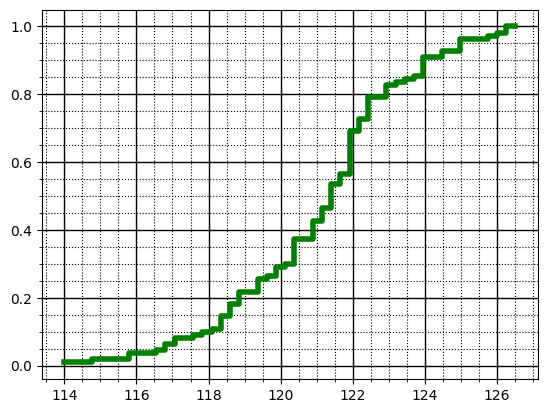

In [46]:
ecdf = sm.distributions.ECDF(a)
x = np.linspace(min(a), max(a))
y = ecdf(x,)
plt.step(x, y, color = 'g',
        linewidth = 4)
plt.minorticks_on()
#  Определяем внешний вид линий основной сетки:
plt.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.show()